In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Fetch market data for multiple stocks using Yahoo Finance
stocks = ['NVDA', 'TSM', 'CSCO', 'META', 'BLBD', 'CLS', 'CMG', 'MFC', 'OKTA', 'PEP', 'ANF', 'ALL', 'GOOG', 'AMZN', 'AAPL', 'BRK-B', 'BLBD', 'CLS', 'CMG', 'MFC', 'OKTA', 'PEP', 'UBER', 'SYF', 'AGX', 'EAT']
data_dict = {}
for stock in stocks:
    data = yf.download(stock, period='300d', interval='1d')  # Fetch 300 days of daily data
    data_dict[stock] = data

# Remove non-trading days by dropping rows where 'Close' is NaN
for stock in data_dict:
    data_dict[stock] = data_dict[stock].dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Fetch fundamental data for all stocks
fundamental_data = {}
for stock in stocks:
    try:
        ticker = yf.Ticker(stock)
        
        # Get company info
        info = ticker.info
        
        # Get financial data
        financials = ticker.financials
        balance_sheet = ticker.balance_sheet
        cashflow = ticker.cashflow
        
        # Store all fundamental data
        fundamental_data[stock] = {
            'info': info,
            'financials': financials,
            'balance_sheet': balance_sheet,
            'cashflow': cashflow
        }
        
    except Exception as e:
        print(f"❌ Error fetching fundamental data for {stock}: {e}")
        fundamental_data[stock] = None

In [ ]:
# Extract key fundamental metrics for analysis
def extract_fundamental_metrics(stock, fundamental_data):
    """
    Extract key fundamental metrics from the fetched data
    """
    if fundamental_data[stock] is None:
        return None
        
    info = fundamental_data[stock]['info']
    metrics = {}
    
    try:
        # Market Metrics
        metrics['market_cap'] = info.get('marketCap', None)
        metrics['enterprise_value'] = info.get('enterpriseValue', None)
        metrics['shares_outstanding'] = info.get('sharesOutstanding', None)
        
        # Valuation Ratios
        metrics['pe_ratio'] = info.get('trailingPE', None)
        metrics['forward_pe'] = info.get('forwardPE', None)
        metrics['peg_ratio'] = info.get('pegRatio', None)
        metrics['price_to_book'] = info.get('priceToBook', None)
        metrics['price_to_sales'] = info.get('priceToSalesTrailing12Months', None)
        metrics['ev_to_revenue'] = info.get('enterpriseToRevenue', None)
        metrics['ev_to_ebitda'] = info.get('enterpriseToEbitda', None)
        
        # Profitability Metrics
        metrics['profit_margin'] = info.get('profitMargins', None)
        metrics['operating_margin'] = info.get('operatingMargins', None)
        metrics['return_on_assets'] = info.get('returnOnAssets', None)
        metrics['return_on_equity'] = info.get('returnOnEquity', None)
        
        # Financial Health
        metrics['total_debt'] = info.get('totalDebt', None)
        metrics['total_cash'] = info.get('totalCash', None)
        metrics['debt_to_equity'] = info.get('debtToEquity', None)
        metrics['current_ratio'] = info.get('currentRatio', None)
        metrics['quick_ratio'] = info.get('quickRatio', None)
        
        # Growth Metrics
        metrics['revenue_growth'] = info.get('revenueGrowth', None)
        metrics['earnings_growth'] = info.get('earningsGrowth', None)
        
        # Dividend Information
        metrics['dividend_yield'] = info.get('dividendYield', None)
        metrics['payout_ratio'] = info.get('payoutRatio', None)
        
        # Other Key Metrics
        metrics['beta'] = info.get('beta', None)
        metrics['52_week_high'] = info.get('fiftyTwoWeekHigh', None)
        metrics['52_week_low'] = info.get('fiftyTwoWeekLow', None)
        metrics['avg_volume'] = info.get('averageVolume', None)
        
        # Company Information
        metrics['sector'] = info.get('sector', None)
        metrics['industry'] = info.get('industry', None)
        metrics['country'] = info.get('country', None)
        metrics['employees'] = info.get('fullTimeEmployees', None)
        
    except Exception as e:
        print(f"Error extracting metrics for {stock}: {e}")
        return None
    
    return metrics

# Extract metrics for all stocks
fundamental_metrics = {}
for stock in stocks:
    metrics = extract_fundamental_metrics(stock, fundamental_data)
    fundamental_metrics[stock] = metrics

✅ Extracted fundamental metrics for NVDA
✅ Extracted fundamental metrics for TSM
✅ Extracted fundamental metrics for CSCO
✅ Extracted fundamental metrics for META


In [5]:
# Display fundamental analysis summary
import pandas as pd

def display_fundamental_analysis():
    """
    Display a comprehensive fundamental analysis summary
    """
    print("\n" + "="*80)
    print("                    FUNDAMENTAL ANALYSIS SUMMARY")
    print("="*80)
    
    # Create a DataFrame for easier comparison
    df_fundamentals = pd.DataFrame(fundamental_metrics).T
    
    # Key metrics to display
    key_metrics = [
        'market_cap', 'pe_ratio', 'forward_pe', 'price_to_book', 'price_to_sales',
        'profit_margin', 'operating_margin', 'return_on_equity', 'debt_to_equity',
        'revenue_growth', 'earnings_growth', 'dividend_yield', 'beta'
    ]
    
    print("\n📊 KEY VALUATION & PERFORMANCE METRICS:")
    print("-" * 60)
    
    for stock in stocks:
        if fundamental_metrics[stock] is not None:
            metrics = fundamental_metrics[stock]
            print(f"\n🏢 {stock} ({metrics.get('sector', 'N/A')} - {metrics.get('industry', 'N/A')})")
            print(f"   Market Cap: ${metrics.get('market_cap', 0):,.0f}" if metrics.get('market_cap') else "   Market Cap: N/A")
            print(f"   P/E Ratio: {metrics.get('pe_ratio', 'N/A'):.2f}" if metrics.get('pe_ratio') else "   P/E Ratio: N/A")
            print(f"   Forward P/E: {metrics.get('forward_pe', 'N/A'):.2f}" if metrics.get('forward_pe') else "   Forward P/E: N/A")
            print(f"   Price/Book: {metrics.get('price_to_book', 'N/A'):.2f}" if metrics.get('price_to_book') else "   Price/Book: N/A")
            print(f"   ROE: {metrics.get('return_on_equity', 'N/A'):.1%}" if metrics.get('return_on_equity') else "   ROE: N/A")
            print(f"   Profit Margin: {metrics.get('profit_margin', 'N/A'):.1%}" if metrics.get('profit_margin') else "   Profit Margin: N/A")
            print(f"   Revenue Growth: {metrics.get('revenue_growth', 'N/A'):.1%}" if metrics.get('revenue_growth') else "   Revenue Growth: N/A")
            print(f"   Beta: {metrics.get('beta', 'N/A'):.2f}" if metrics.get('beta') else "   Beta: N/A")
            print(f"   Debt/Equity: {metrics.get('debt_to_equity', 'N/A'):.2f}" if metrics.get('debt_to_equity') else "   Debt/Equity: N/A")
    
    # Create comparison table for key metrics
    print("\n📈 COMPARATIVE ANALYSIS:")
    print("-" * 60)
    
    comparison_metrics = ['pe_ratio', 'forward_pe', 'price_to_book', 'return_on_equity', 'profit_margin', 'revenue_growth', 'beta']
    comparison_df = pd.DataFrame({stock: [fundamental_metrics[stock].get(metric) if fundamental_metrics[stock] else None 
                                         for metric in comparison_metrics] for stock in stocks}, 
                                index=comparison_metrics)
    
    # Format the comparison table
    formatted_df = comparison_df.copy()
    percentage_metrics = ['return_on_equity', 'profit_margin', 'revenue_growth']
    
    for metric in comparison_metrics:
        if metric in percentage_metrics:
            for stock in stocks:
                value = formatted_df.loc[metric, stock]
                if value is not None:
                    formatted_df.loc[metric, stock] = f"{value:.1%}"
        else:
            for stock in stocks:
                value = formatted_df.loc[metric, stock]
                if value is not None:
                    formatted_df.loc[metric, stock] = f"{value:.2f}"
    
    print(formatted_df.fillna('N/A'))
    
    return df_fundamentals

# Execute fundamental analysis display
df_fundamentals = display_fundamental_analysis()


                    FUNDAMENTAL ANALYSIS SUMMARY

📊 KEY VALUATION & PERFORMANCE METRICS:
------------------------------------------------------------

🏢 NVDA (Technology - Semiconductors)
   Market Cap: $3,518,852,759,552
   P/E Ratio: 46.54
   Forward P/E: 35.02
   Price/Book: 41.97
   ROE: 115.5%
   Profit Margin: 51.7%
   Revenue Growth: 69.2%
   Beta: 2.12
   Debt/Equity: 12.27

🏢 TSM (Technology - Semiconductors)
   Market Cap: $1,113,312,460,800
   P/E Ratio: 25.77
   Forward P/E: 26.57
   Price/Book: 1.22
   ROE: 31.6%
   Profit Margin: 41.7%
   Revenue Growth: 41.6%
   Beta: 1.34
   Debt/Equity: 23.49

🏢 CSCO (Technology - Communication Equipment)
   Market Cap: $257,657,405,440
   P/E Ratio: 26.56
   Forward P/E: 16.68
   Price/Book: 5.61
   ROE: 21.4%
   Profit Margin: 17.6%
   Revenue Growth: 11.4%
   Beta: 0.88
   Debt/Equity: 66.93

🏢 META (Communication Services - Internet Content & Information)
   Market Cap: $1,739,966,775,296
   P/E Ratio: 27.02
   Forward P/E: 27.35


C:\Users\WRSWAC\AppData\Local\Temp\1\ipykernel_31892\4011729568.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.54' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_df.loc[metric, stock] = f"{value:.2f}"
C:\Users\WRSWAC\AppData\Local\Temp\1\ipykernel_31892\4011729568.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.77' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_df.loc[metric, stock] = f"{value:.2f}"
C:\Users\WRSWAC\AppData\Local\Temp\1\ipykernel_31892\4011729568.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '26.56' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatte

In [6]:
# Generate fundamental analysis scores and rankings
def calculate_fundamental_scores(fundamental_metrics):
    """
    Calculate fundamental analysis scores for each stock
    """
    scores = {}
    
    for stock in stocks:
        if fundamental_metrics[stock] is None:
            scores[stock] = {'total_score': 0, 'category_scores': {}, 'ranking': 'POOR'}
            continue
            
        metrics = fundamental_metrics[stock]
        category_scores = {}
        
        # 1. Valuation Score (lower is better for ratios)
        valuation_score = 0
        valuation_count = 0
        
        # P/E Ratio (lower is better, but not too low)
        pe = metrics.get('pe_ratio')
        if pe and pe > 0:
            if pe < 15:
                valuation_score += 10
            elif pe < 25:
                valuation_score += 7
            elif pe < 35:
                valuation_score += 4
            else:
                valuation_score += 1
            valuation_count += 1
            
        # Price to Book (lower is better)
        pb = metrics.get('price_to_book')
        if pb and pb > 0:
            if pb < 1.5:
                valuation_score += 10
            elif pb < 3:
                valuation_score += 7
            elif pb < 5:
                valuation_score += 4
            else:
                valuation_score += 1
            valuation_count += 1
            
        category_scores['valuation'] = (valuation_score / max(valuation_count, 1)) if valuation_count > 0 else 0
        
        # 2. Profitability Score (higher is better)
        profitability_score = 0
        profitability_count = 0
        
        # ROE (higher is better)
        roe = metrics.get('return_on_equity')
        if roe and roe > 0:
            if roe > 0.20:
                profitability_score += 10
            elif roe > 0.15:
                profitability_score += 8
            elif roe > 0.10:
                profitability_score += 6
            elif roe > 0.05:
                profitability_score += 3
            else:
                profitability_score += 1
            profitability_count += 1
            
        # Profit Margin (higher is better)
        profit_margin = metrics.get('profit_margin')
        if profit_margin and profit_margin > 0:
            if profit_margin > 0.20:
                profitability_score += 10
            elif profit_margin > 0.15:
                profitability_score += 8
            elif profit_margin > 0.10:
                profitability_score += 6
            elif profit_margin > 0.05:
                profitability_score += 3
            else:
                profitability_score += 1
            profitability_count += 1
            
        category_scores['profitability'] = (profitability_score / max(profitability_count, 1)) if profitability_count > 0 else 0
        
        # 3. Growth Score (higher is better)
        growth_score = 0
        growth_count = 0
        
        # Revenue Growth
        revenue_growth = metrics.get('revenue_growth')
        if revenue_growth is not None:
            if revenue_growth > 0.20:
                growth_score += 10
            elif revenue_growth > 0.10:
                growth_score += 8
            elif revenue_growth > 0.05:
                growth_score += 6
            elif revenue_growth > 0:
                growth_score += 4
            else:
                growth_score += 1
            growth_count += 1
            
        # Earnings Growth
        earnings_growth = metrics.get('earnings_growth')
        if earnings_growth is not None:
            if earnings_growth > 0.20:
                growth_score += 10
            elif earnings_growth > 0.10:
                growth_score += 8
            elif earnings_growth > 0.05:
                growth_score += 6
            elif earnings_growth > 0:
                growth_score += 4
            else:
                growth_score += 1
            growth_count += 1
            
        category_scores['growth'] = (growth_score / max(growth_count, 1)) if growth_count > 0 else 0
        
        # 4. Financial Health Score
        health_score = 0
        health_count = 0
        
        # Debt to Equity (lower is better)
        debt_to_equity = metrics.get('debt_to_equity')
        if debt_to_equity is not None:
            if debt_to_equity < 0.3:
                health_score += 10
            elif debt_to_equity < 0.6:
                health_score += 8
            elif debt_to_equity < 1.0:
                health_score += 6
            elif debt_to_equity < 2.0:
                health_score += 3
            else:
                health_score += 1
            health_count += 1
            
        # Current Ratio (around 1.5-3 is good)
        current_ratio = metrics.get('current_ratio')
        if current_ratio is not None:
            if 1.5 <= current_ratio <= 3:
                health_score += 10
            elif 1.2 <= current_ratio < 1.5 or 3 < current_ratio <= 4:
                health_score += 7
            elif 1.0 <= current_ratio < 1.2 or 4 < current_ratio <= 5:
                health_score += 4
            else:
                health_score += 1
            health_count += 1
            
        category_scores['financial_health'] = (health_score / max(health_count, 1)) if health_count > 0 else 0
        
        # Calculate total score
        total_score = sum(category_scores.values()) / len(category_scores)
        
        # Determine ranking
        if total_score >= 8:
            ranking = 'EXCELLENT'
        elif total_score >= 6:
            ranking = 'GOOD'
        elif total_score >= 4:
            ranking = 'AVERAGE'
        elif total_score >= 2:
            ranking = 'BELOW_AVERAGE'
        else:
            ranking = 'POOR'
            
        scores[stock] = {
            'total_score': total_score,
            'category_scores': category_scores,
            'ranking': ranking
        }
    
    return scores

# Calculate fundamental scores
fundamental_scores = calculate_fundamental_scores(fundamental_metrics)

# Display scores
print("\n" + "="*80)
print("                    FUNDAMENTAL ANALYSIS SCORES")
print("="*80)

for stock in stocks:
    score_data = fundamental_scores[stock]
    print(f"\n🏢 {stock}:")
    print(f"   Overall Score: {score_data['total_score']:.1f}/10 - {score_data['ranking']}")
    if score_data['category_scores']:
        print(f"   Valuation: {score_data['category_scores'].get('valuation', 0):.1f}/10")
        print(f"   Profitability: {score_data['category_scores'].get('profitability', 0):.1f}/10")
        print(f"   Growth: {score_data['category_scores'].get('growth', 0):.1f}/10")
        print(f"   Financial Health: {score_data['category_scores'].get('financial_health', 0):.1f}/10")

# Rank stocks by fundamental score
ranked_stocks = sorted(fundamental_scores.items(), key=lambda x: x[1]['total_score'], reverse=True)
print(f"\n🏆 FUNDAMENTAL RANKING:")
for i, (stock, score_data) in enumerate(ranked_stocks, 1):
    print(f"   {i}. {stock}: {score_data['total_score']:.1f}/10 ({score_data['ranking']})")


                    FUNDAMENTAL ANALYSIS SCORES

🏢 NVDA:
   Overall Score: 6.2/10 - GOOD
   Valuation: 1.0/10
   Profitability: 10.0/10
   Growth: 10.0/10
   Financial Health: 4.0/10

🏢 TSM:
   Overall Score: 8.1/10 - EXCELLENT
   Valuation: 7.0/10
   Profitability: 10.0/10
   Growth: 10.0/10
   Financial Health: 5.5/10

🏢 CSCO:
   Overall Score: 5.4/10 - AVERAGE
   Valuation: 2.5/10
   Profitability: 9.0/10
   Growth: 9.0/10
   Financial Health: 1.0/10

🏢 META:
   Overall Score: 6.8/10 - GOOD
   Valuation: 2.5/10
   Profitability: 10.0/10
   Growth: 9.0/10
   Financial Health: 5.5/10

🏆 FUNDAMENTAL RANKING:
   1. TSM: 8.1/10 (EXCELLENT)
   2. META: 6.8/10 (GOOD)
   3. NVDA: 6.2/10 (GOOD)
   4. CSCO: 5.4/10 (AVERAGE)


In [7]:
# Perform calculations for each stock
for stock, data in data_dict.items():
    
    # Check if data has MultiIndex columns and flatten if needed
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)  # Remove ticker level from columns
    
    # Ensure sufficient data points for rolling calculations
    if len(data) < 30:
        print(f"  ❌ Insufficient data for {stock}. Skipping calculations.")
        continue
    
    # Verify column references
    required_columns = ['Close', 'High', 'Low']
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        print(f"  ❌ Missing required columns in {stock}: {missing_columns}. Skipping calculations.")
        continue

    # Ensure data is sorted by date
    data = data.sort_index()
    
    # 1. Calculate 30-Day Moving Average
    data['30_Moving_Avg'] = data['Close'].rolling(window=30, min_periods=1).mean()
    
    # 2. Calculate Stochastic Oscillator
    high_14 = data['High'].rolling(window=14, min_periods=1).max()
    low_14 = data['Low'].rolling(window=14, min_periods=1).min()
    
    # Calculate %K (avoid division by zero)
    denominator = (high_14 - low_14)
    denominator = denominator.replace(0, 1e-10)  # Replace zeros with small number
    data['%K'] = (data['Close'] - low_14) * 100 / denominator
    
    # Smooth %K and calculate %D
    data['%K'] = data['%K'].rolling(window=3, min_periods=1).mean()  # smooth_k = 3
    data['%D'] = data['%K'].rolling(window=3, min_periods=1).mean()  # d_period = 3
    data['Smoothed_%D'] = data['%D'].rolling(window=30, min_periods=1).mean()
    
    # 3. Calculate MACD
    data['12_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['26_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['12_EMA'] - data['26_EMA']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    # Smooth the MACD and Signal Line further
    data['Smoothed_MACD'] = data['MACD'].rolling(window=15, min_periods=1).mean()
    data['Smoothed_Signal_Line'] = data['Signal_Line'].rolling(window=15, min_periods=1).mean()
    
    # Update the data_dict with calculated indicators
    data_dict[stock] = data

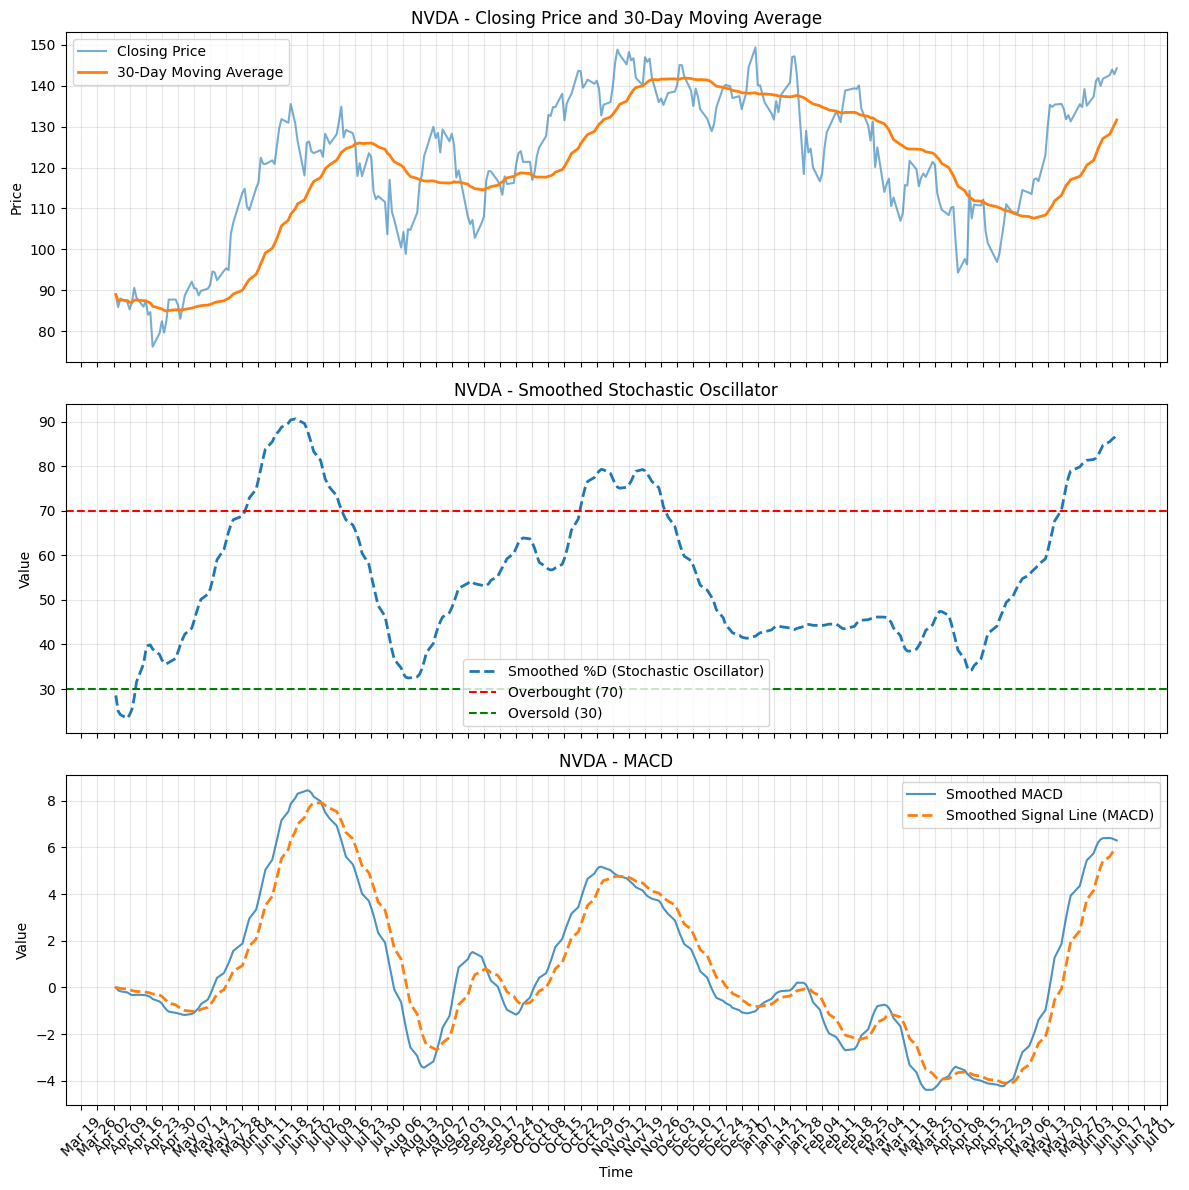

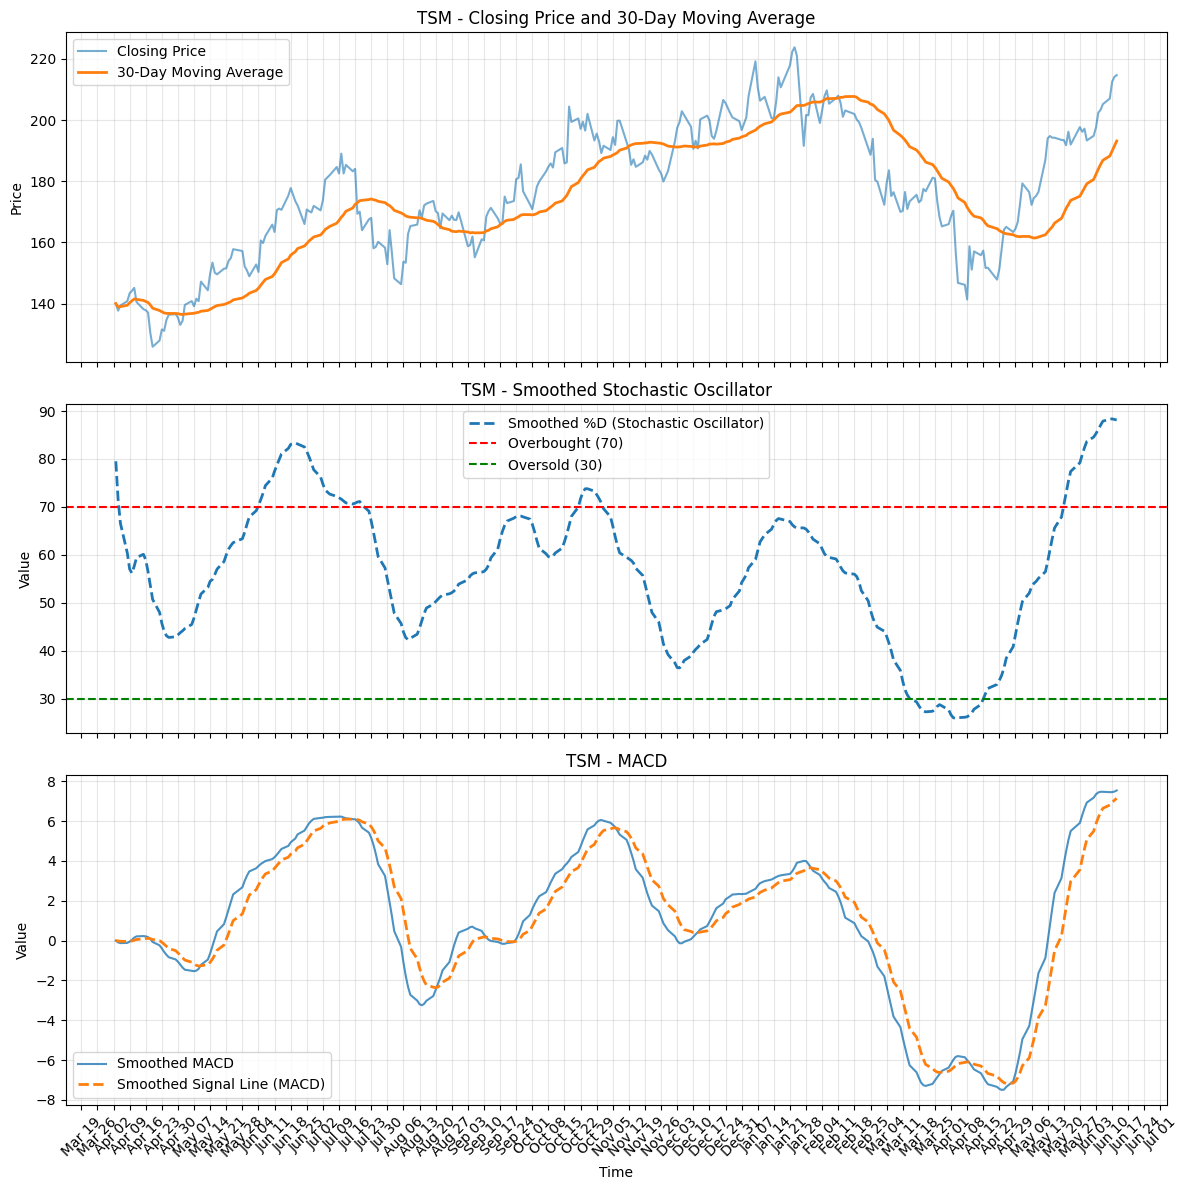

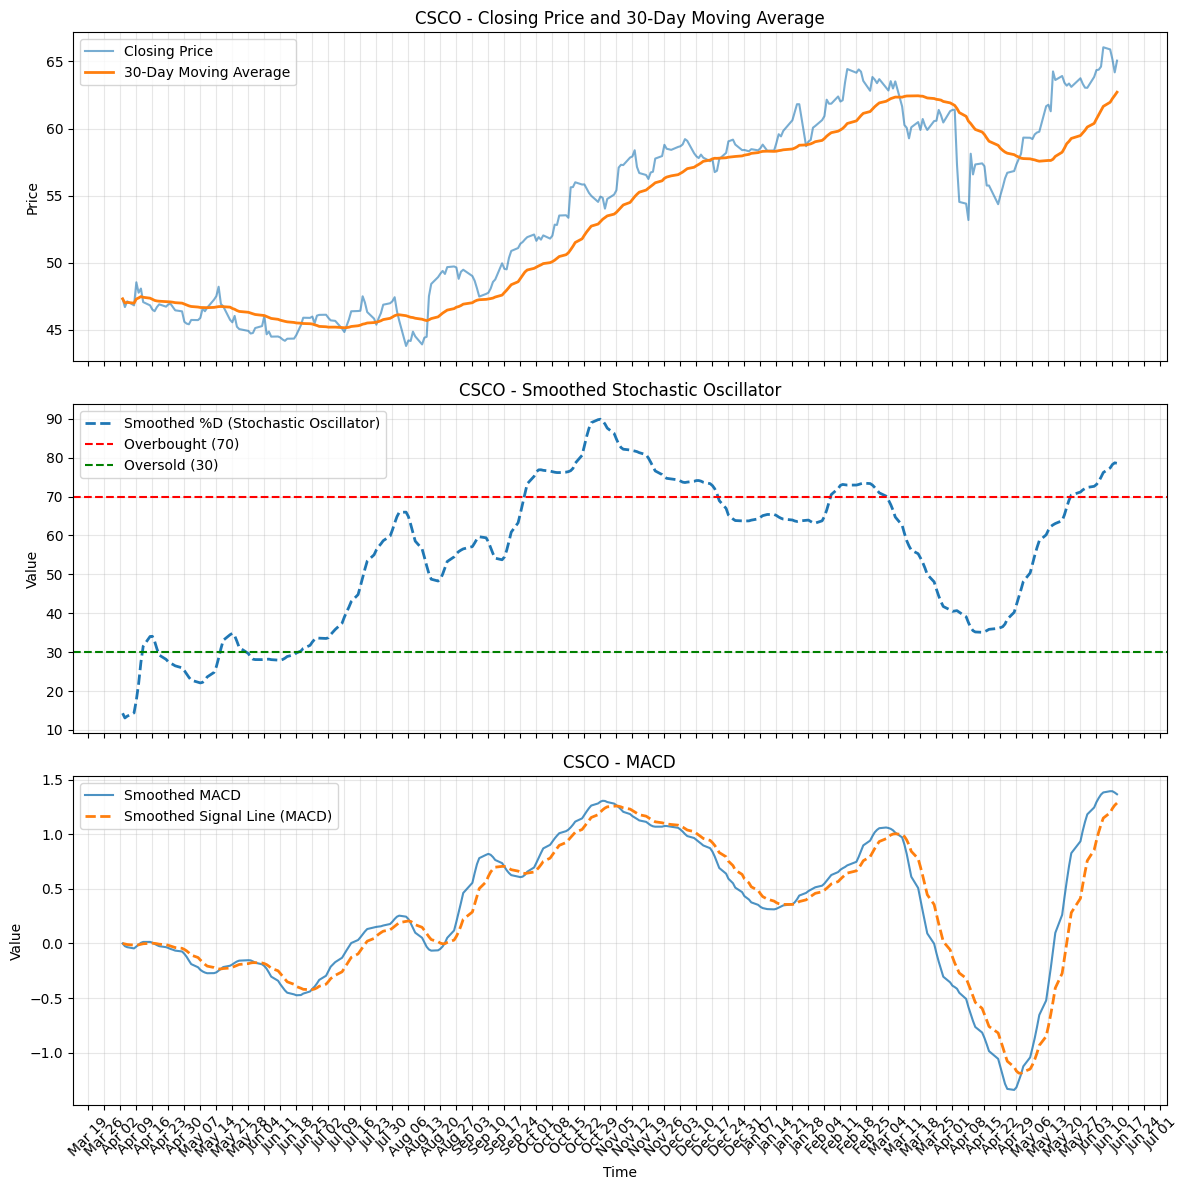

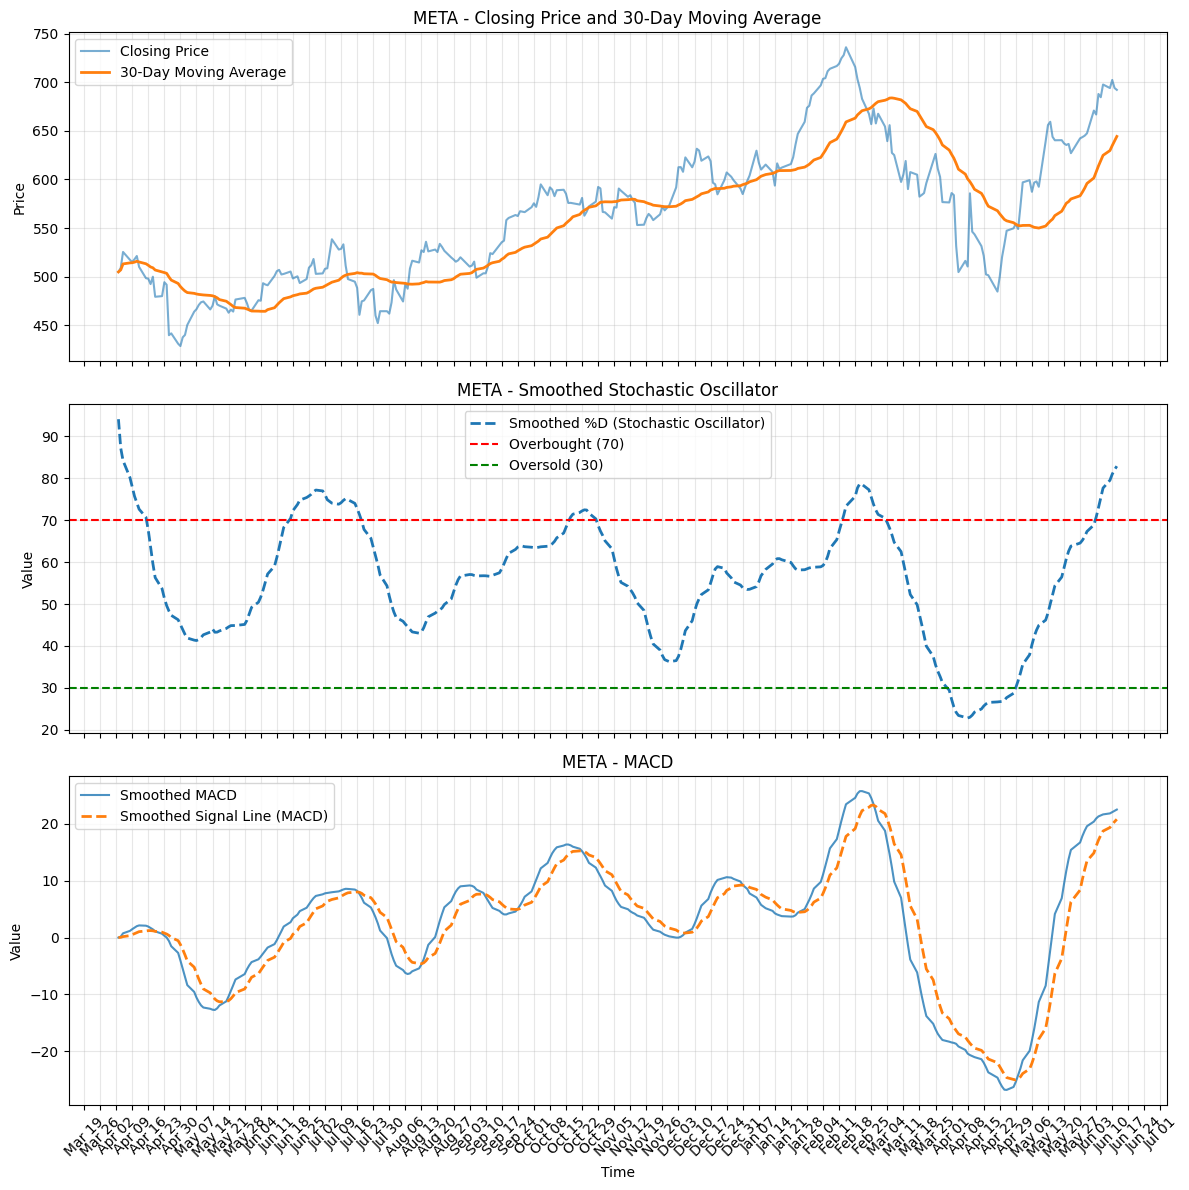

In [8]:
# Plot all indicators in subplots for the full data range
import matplotlib.dates as mdates
for stock, data in data_dict.items():
    # Ensure data is sorted and has no NaNs in plotting columns
    data = data.sort_index()#.dropna()

    # If MultiIndex, select only the current ticker for plotting
    if isinstance(data.index, pd.MultiIndex):
        data = data.xs(stock, level='Ticker')

    fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    # Plot Closing Price and 30-Day Moving Average
    axs[0].plot(data.index, data['Close'], label='Closing Price', alpha=0.6)
    axs[0].plot(data.index, data['30_Moving_Avg'], label='30-Day Moving Average', linewidth=2)
    axs[0].set_title(f'{stock} - Closing Price and 30-Day Moving Average')
    axs[0].set_ylabel('Price')
    axs[0].legend()
    axs[0].grid(alpha=0.3)

    # Plot Smoothed Stochastic Oscillator
    axs[1].plot(data.index, data['Smoothed_%D'], label='Smoothed %D (Stochastic Oscillator)', linestyle='--', linewidth=2)
    axs[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axs[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axs[1].set_title(f'{stock} - Smoothed Stochastic Oscillator')
    axs[1].set_ylabel('Value')
    axs[1].legend()
    axs[1].grid(alpha=0.3)

    # Plot MACD with proper scaling
    axs[2].plot(data.index, data['Smoothed_MACD'], label='Smoothed MACD', alpha=0.8)
    axs[2].plot(data.index, data['Smoothed_Signal_Line'], label='Smoothed Signal Line (MACD)', linestyle='--', linewidth=2)
    axs[2].set_title(f'{stock} - MACD')
    axs[2].set_ylabel('Value')
    axs[2].legend()
    axs[2].grid(alpha=0.3)

    # Adjust x-axis tick frequency to display more dates
    axs[2].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show ticks for every week
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Month Day'
    plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)  # Rotate labels for better readability

    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

In [9]:
# Data structure validation before generating recommendations
print("=== PREPARING DATA FOR RECOMMENDATIONS ===")
for stock in data_dict.keys():
    data = data_dict[stock]
    
    # Verify we have all required columns for recommendations
    required_cols = ['Close', '30_Moving_Avg', 'Smoothed_%D', 'Smoothed_MACD', 'Smoothed_Signal_Line']
    missing_cols = [col for col in required_cols if col not in data.columns]
    
    if missing_cols:
        print(f"❌ {stock}: Missing columns {missing_cols}")
    else:
        print(f"✅ {stock}: All required columns present")
        
        # Check for NaN values in recent data (last 10 rows)
        recent_data = data[required_cols].tail(10)
        for col in required_cols:
            nan_count = recent_data[col].isna().sum()
            if nan_count > 0:
                print(f"  ⚠️ {col}: {nan_count}/10 recent values are NaN")
            else:
                print(f"  ✅ {col}: All recent values valid")

=== PREPARING DATA FOR RECOMMENDATIONS ===
✅ NVDA: All required columns present
  ✅ Close: All recent values valid
  ✅ 30_Moving_Avg: All recent values valid
  ✅ Smoothed_%D: All recent values valid
  ✅ Smoothed_MACD: All recent values valid
  ✅ Smoothed_Signal_Line: All recent values valid
✅ TSM: All required columns present
  ✅ Close: All recent values valid
  ✅ 30_Moving_Avg: All recent values valid
  ✅ Smoothed_%D: All recent values valid
  ✅ Smoothed_MACD: All recent values valid
  ✅ Smoothed_Signal_Line: All recent values valid
✅ CSCO: All required columns present
  ✅ Close: All recent values valid
  ✅ 30_Moving_Avg: All recent values valid
  ✅ Smoothed_%D: All recent values valid
  ✅ Smoothed_MACD: All recent values valid
  ✅ Smoothed_Signal_Line: All recent values valid
✅ META: All required columns present
  ✅ Close: All recent values valid
  ✅ 30_Moving_Avg: All recent values valid
  ✅ Smoothed_%D: All recent values valid
  ✅ Smoothed_MACD: All recent values valid
  ✅ Smoothed

In [10]:
# Initialize recommendations as an empty dictionary
recommendations = {}

# Clean and robust buy/sell signal generation without align
for stock, data in data_dict.items():

    # Use .loc to avoid SettingWithCopyWarning
    data.loc[:, 'buy_ma'] = (data['Close'] > data['30_Moving_Avg'])
    data.loc[:, 'buy_stochastic'] = (data['Smoothed_%D'] > 30) & (data['Smoothed_%D'].shift(1) <= 30)
    data.loc[:, 'buy_macd'] = (data['Smoothed_MACD'] > data['Smoothed_Signal_Line']) & (data['Smoothed_MACD'].shift(1) <= data['Smoothed_Signal_Line'].shift(1))

    data.loc[:, 'sell_ma'] = (data['Close'] < data['30_Moving_Avg'])
    data.loc[:, 'sell_stochastic'] = (data['Smoothed_%D'] < 30) & (data['Smoothed_%D'].shift(1) >= 30)
    data.loc[:, 'sell_macd'] = (data['Smoothed_MACD'] < data['Smoothed_Signal_Line']) & (data['Smoothed_MACD'].shift(1) >= data['Smoothed_Signal_Line'].shift(1))

    window = 10
    buy_signal = (
        data['buy_ma'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool) &
        data['buy_stochastic'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool) &
        data['buy_macd'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool)
    )
    data.loc[:, 'Buy_Signal'] = buy_signal

    sell_signal = (
        data['sell_ma'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool) &
        data['sell_stochastic'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool) &
        data['sell_macd'].rolling(window=window, min_periods=window).max().fillna(False).astype(bool)
    )
    data.loc[:, 'Sell_Signal'] = sell_signal


    # Optionally, update data_dict with the cleaned DataFrame
    data_dict[stock] = data
    # Optionally, store recommendations
    recommendations[stock] = data[['Buy_Signal', 'Sell_Signal']]